In [ ]:
import numpy as np
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
!unzip WSJCorpus\ \(2\).zip

Archive:  WSJCorpus (2).zip
replace raw/wsj_0042? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pos_texts = []
raw_texts = []

for filename in os.listdir("/content/pos"):
  if filename.endswith(".pos"):
    with open(os.path.join("/content/pos",filename),"r",encoding='utf-8') as file:
      pos_texts.append(file.read())

for filename in os.listdir("/content/raw"):
  if filename.startswith("wsj_") and not filename.endswith(".pos"):
    with open(os.path.join("/content/raw", filename),"r",encoding ='utf-8' ) as file:
      raw_texts.append(file.read())

assert len(pos_texts) == len(raw_texts)


In [ ]:
tokenized_sentences = [sentence.split() for sentence in  raw_texts]

pos_tags3 = [sentence.split() for sentence in pos_texts]

In [ ]:
pos_tags4 = []
for i in pos_tags3:
  pos_tags4.extend(i)

In [ ]:
!pip install regex

In [ ]:
import regex as re
words = []
pos_tags = []

pattern = r'/'
for pair in pos_tags4:
  parts = re.split(pattern,pair)
  if len(parts) == 2:
    word,pos = parts
    words.append(word)
    pos_tags.append(pos)
  else:
    print("Invalid pair:",pair)

Invalid pair: 3\/8/CD
Invalid pair: 1\/8/CD
Invalid pair: 1\/4/CD
Invalid pair: 3\/8/CD
Invalid pair: 1\/2/CD
Invalid pair: 3\/8/CD
Invalid pair: 1\/2/CD
Invalid pair: 5\/8/CD
Invalid pair: 5\/8/CD
Invalid pair: 1\/2/CD
Invalid pair: 7\/8/CD
Invalid pair: 1\/2/CD
Invalid pair: 1\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 7\/8/CD
Invalid pair: 7\/8/CD
Invalid pair: 3\/4/CD
Invalid pair: 7\/8/CD
Invalid pair: 5\/8/CD
Invalid pair: 1\/2/CD
Invalid pair: 1\/2/CD
Invalid pair: 3\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 7\/8/CD
Invalid pair: 1\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 1\/4/CD
Invalid pair: 5\/8/CD
Invalid pair: 3\/4/CD
Invalid pair: 5\/8/CD
Invalid pair: 7\/8/CD
Invalid pair: 5\/8/CD
Invalid pair: 5\/8/CD
Invalid pair: 1\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 1\/2/CD
Invalid pair: 5\/8/CD
Invalid pair: 1\/4/CD
Invalid pair: 1\/4/CD
Invalid pair: 7\/8/CD
Invalid pair: 3\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 3\/4/CD
Invalid pair: 7\/8/CD
Invalid pair: Guber\/Peters/NNP


In [ ]:
len(words)

94043

In [ ]:
len(pos_tags)

94043

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(words,pos_tags,test_size =0.2,random_state =42)
X_val,X_test,y_val,y_test = train_test_split(X_val_test,y_val_test,test_size =0.5,random_state=42)

In [ ]:
word2idx = {word:idx for idx, word in enumerate(words)}
pos2idx = {pos: idx for idx, pos in enumerate(set(pos_tags))}


In [ ]:
X_train_idx = [word2idx[word] for word in X_train]
y_train_idx = [pos2idx[tag] for tag in y_train]

In [ ]:
X_val_idx = [word2idx[word] for word in X_val]
y_val_idx = [pos2idx[tag] for tag in y_val]

In [ ]:
X_test_idx = [word2idx[word] for word in X_test]
y_test_idx = [pos2idx[tag] for tag in y_test]

In [ ]:
class RNNPosTagger(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units, num_classes):
        super(RNNPosTagger, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.rnn = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True))
        self.fc = tf.keras.layers.Dense(num_classes, activation="softmax")

    def call(self, x):

        x = tf.expand_dims(x, axis=-1)
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.fc(x)
        return x


In [ ]:
vocab_size = len(set(word for word in words))
embedding_dim = 100
rnn_units =128
num_classes = len(set(tag for tag in pos_tags))

In [ ]:
print(vocab_size,num_classes)

11962 46


In [ ]:
model = RNNPosTagger(vocab_size, embedding_dim, rnn_units, num_classes)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()


In [ ]:
def train_step(model, inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss


Epoch 1, Training Loss: 3.0237879753112793
Epoch 1, Validation Loss: 3.0022034645080566
Epoch 2, Training Loss: 2.979670286178589
Epoch 2, Validation Loss: 2.999502658843994
Epoch 3, Training Loss: 2.970538377761841
Epoch 3, Validation Loss: 2.99951434135437
Epoch 4, Training Loss: 2.9683940410614014
Epoch 4, Validation Loss: 2.99949049949646
Epoch 5, Training Loss: 2.967059850692749
Epoch 5, Validation Loss: 2.999431848526001
Epoch 6, Training Loss: 2.9664065837860107
Epoch 6, Validation Loss: 2.9993438720703125
Epoch 7, Training Loss: 2.966139078140259
Epoch 7, Validation Loss: 2.9993298053741455
Epoch 8, Training Loss: 2.965963363647461
Epoch 8, Validation Loss: 2.999366283416748
Epoch 9, Training Loss: 2.9658291339874268
Epoch 9, Validation Loss: 2.999378204345703
Epoch 10, Training Loss: 2.9657437801361084
Epoch 10, Validation Loss: 2.9994089603424072
Epoch 11, Training Loss: 2.965646982192993
Epoch 11, Validation Loss: 2.9993927478790283
Epoch 12, Training Loss: 2.965569496154785

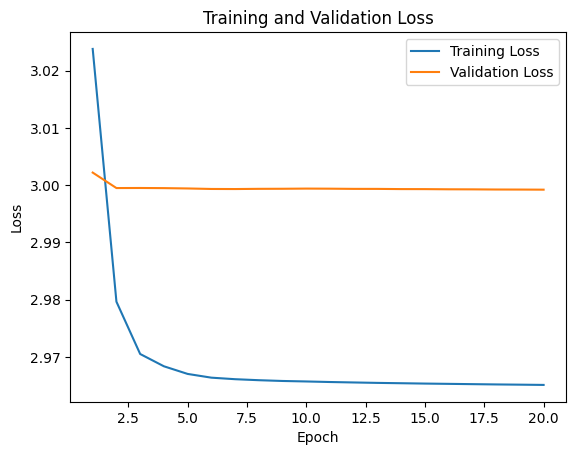

In [ ]:
import matplotlib.pyplot as plt
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
batch_size = 32
train_losses = []
val_losses = []
epochs = 20
for epoch in range(epochs):
    epoch_loss = 0.0
    num_batches = len(X_train_idx) // batch_size

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(X_train_idx))
        batch_X_train = X_train_idx[start_idx:end_idx]
        batch_y_train = y_train_idx[start_idx:end_idx]

        # Convert sequences to TensorFlow tensors
        batch_X_train_tensor = tf.convert_to_tensor(batch_X_train)
        batch_y_train_tensor = tf.convert_to_tensor(batch_y_train)

        # Perform a training step
        loss = train_step(model, batch_X_train_tensor, batch_y_train_tensor)
        epoch_loss += loss

    # Calculate average epoch training loss
    epoch_loss /= num_batches
    train_losses.append(epoch_loss)

    # Print or log the epoch training loss
    print(f"Epoch {epoch + 1}, Training Loss: {epoch_loss}")

    # Evaluate the model on the validation set
    val_loss = model.evaluate(X_val_idx, y_val_idx, verbose=0)
    val_losses.append(val_loss)

    # Print or log the epoch validation loss
    print(f"Epoch {epoch + 1}, Validation Loss: {val_loss}")

# Plot the loss graph
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = model.predict(X_test_idx)
idx2pos = {idx: pos for pos, idx in pos2idx.items()}

# Convert predicted labels back to original POS tags
y_pred_tags = [idx2pos[np.argmax(pred)] for pred in y_pred]

# Calculate evaluation metrics for each POS tag
pos_tags = set(pos_tags)
evaluation_metrics = {}

for tag in pos_tags:
    true_labels = [tag == true_tag for true_tag in y_test]
    pred_labels = [tag == pred_tag for pred_tag in y_pred_tags]

    accuracy = accuracy_score(true_labels, pred_labels)

    # Calculate precision, recall, and F1-score only if there are true positives (TP)
    if sum(true_labels) > 0:
        precision = precision_score(true_labels, pred_labels)
        recall = recall_score(true_labels, pred_labels)
        f1 = f1_score(true_labels, pred_labels)
    else:
        precision = 0.0
        recall = 0.0
        f1 = 0.0

    evaluation_metrics[tag] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Print evaluation metrics for each POS tag
for tag, metrics in evaluation_metrics.items():
    print(f"POS Tag: {tag}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()


294/294 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

POS Tag: VBG
Accuracy: 0.9835194045720361
Precision: 1.0
Recall: 0.012738853503184714
F1-score: 0.025157232704402517

POS Tag: .
Accuracy: 0.9586390217969165
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: $
Accuracy: 0.9923444976076555
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: ,
Accuracy: 0.9461988304093567
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: DT
Accuracy: 0.9148325358851674
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: JJS
Accuracy: 0.9984051036682615
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: NNP
Accuracy: 0.9033492822966507
Precision: 0.6470588235294118
Recall: 0.012035010940919038
F1-score: 0.023630504833512353

POS Tag: (
Accuracy: 0.9985114300903775
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: UH
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: TO
Accuracy: 0.9746943115364168
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: WDT
Accuracy: 0.9946836788942052
Precision: 0.0
Recall: 0.0
F1-score: 0.0

POS Tag: PDT
Accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
